In [ ]:
#| hide
from backtest_sample.core import *
from backtest_sample.data_interface import *
from backtest_sample.backtest_loop import backtest

# backtest_sample

This is a simple illustration of how to build a flexible backtesting environment. Different models can be added by adding new classes to folders, er, risk, pm, and tc. A general interface (data_interface.py) can be used to call these different models, making it easy to change them. The actual backtest loop is performend by the backtest memeber function within backtest_loop.py.

The code is basic, lacks tests, and was not extensively debugged. I intended to present a toy program that introduces the basic backtesting features. Substantial work remains to produce a fully functional backtesting infrastructure.

A parameter optimization infrastructure is the most substantial feature that needs to be added. This can be added within the backtest loop to optimize only using past data, and I intend to add it in the future.

One final observation: the data schema is fundamental for such a program. I assume we are downloading Yahoo Finance's data (“OHLCAV”). Throughout the code, this data convention is used without further checks. This is something that needs to be addressed in professional backtest code.

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install backtest_sample in Development mode

```sh
# make sure backtest_sample package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to backtest_sample
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/silvaac/backtest_sample.git
```

[repo]: https://github.com/silvaac/backtest_sample
[docs]: https://www.idatafactory.com/backtest_sample/

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs].

[repo]: https://github.com/silvaac/backtest_sample
[docs]: https://www.idatafactory.com/backtest_sample/

## How to use

### Get data 
You can only get data from yahoo finance at the moment.

In [ ]:
from backtest_sample.data_interface import *
from backtest_sample.backtest_loop import backtest

In [ ]:
import_module = get_data()
df = import_module('BTC-USD').sim_data()
print(df.tail())

[*********************100%***********************]  1 of 1 completed

                    Open          High  ...     Adj Close       Volume
Date                                    ...                           
2024-09-13  58130.324219  60648.023438  ...  60571.300781  32490528356
2024-09-14  60569.117188  60656.722656  ...  60005.121094  16428405496
2024-09-15  60000.726562  60381.917969  ...  59182.835938  18120960867
2024-09-16  59185.226562  59205.511719  ...  58192.507812  32032822113
2024-09-17  58204.093750  61270.953125  ...  60976.371094  34488045568

[5 rows x 6 columns]
                    Open          High  ...     Adj Close       Volume
Date                                    ...                           
2024-09-13  58130.324219  60648.023438  ...  60571.300781  32490528356
2024-09-14  60569.117188  60656.722656  ...  60005.121094  16428405496
2024-09-15  60000.726562  60381.917969  ...  59182.835938  18120960867
2024-09-16  59185.226562  59205.511719  ...  58192.507812  32032822113
2024-09-17  58204.093750  61270.953125  ...  60976.3710

### Parameters

Select the parameters of the backtest and the model.


In [ ]:
# parameters
prm = {}
## General parameters
prm['when_trade'] = 'open' # when to trade
prm['start_date'] = 100    # how many periods (days here) to skip before trading
## ER model
prm['er_member_func'] = get_er() # Select the model class
# ER model parameters (see model for detail)
prm['mawin'] = 10
prm['sdwin'] = 30
## Risk model
prm['risk_member_func'] = get_risk() # Select the model class
# Risk model parameter (see model for detail)
prm['wvol']  = 60
## PM allocation model
prm['pm_member_func'] = get_pm() # Select the model class
# PM parameters (see model for detail)
prm['target_vol'] = 0.005 # target volatility per backtesting step (daily here)
prm['AUM'] = 10e6  # Investment capital in the currency of the data ($ here)
## TC model parameters
prm['tc_member_func'] = get_tc() # Select the model class
# TC parameters (see model for detail)
prm['tc_slope'] = 1e3
prm['tc_bias'] = 100


### Run the backtest
Pass the parameters and the data. Output is a dataframe with col:

* trade: number of shares/contracts to be bought (>0) or sold (<0)
* position: this is the target position for the next time period (here day)
* er: expected return for the next time interval (here day)
* vol: expected volatility for the next time interval (here day)
* pnl0: profit or loss for the time interval without TC (here day)
* pnl: profit or loss for the time interval including TC (here day)

In [ ]:
bkt = backtest(df,prm)
print(bkt.tail())

            trade  position      er     vol         pnl0          pnl
2024-09-13     -2        -2 -0.0673  0.0307     0.000000  -100.264222
2024-09-14      8         6  0.2064  0.0300 -4881.953125 -4982.128923
2024-09-15     -2         4  0.1360  0.0300 -3379.609375 -3480.283094
2024-09-16      2         6  0.2066  0.0300 -3297.929688 -3398.099201
2024-09-17      2         8  0.2926  0.0301 -5946.750000 -6046.919490
            trade  position      er     vol         pnl0          pnl
2024-09-13     -2        -2 -0.0673  0.0307     0.000000  -100.264222
2024-09-14      8         6  0.2064  0.0300 -4881.953125 -4982.128923
2024-09-15     -2         4  0.1360  0.0300 -3379.609375 -3480.283094
2024-09-16      2         6  0.2066  0.0300 -3297.929688 -3398.099201
2024-09-17      2         8  0.2926  0.0301 -5946.750000 -6046.919490


Sample plot of the data:

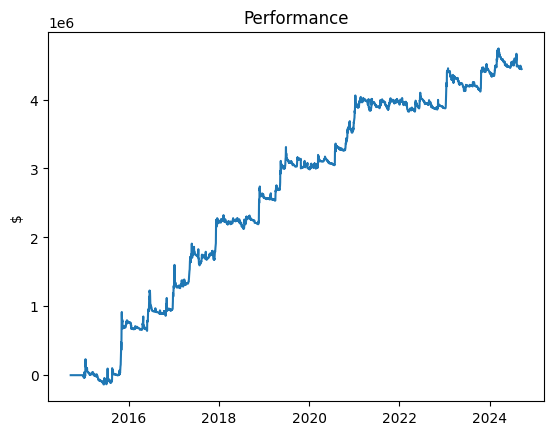

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the data
plt.plot(bkt['pnl'].cumsum())

# Add labels and title
plt.xlabel('')
plt.ylabel('$')
plt.title('Performance')

# Show the plot
plt.show()